# Converging and converging-diverging nozzles (part I)

In [10]:
# Necessary modules to solve problems
import numpy as np
from scipy.optimize import root_scalar

# Pint gives us some helpful unit conversion
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity # We will use this to construct quantities (value + unit)

%matplotlib inline
from matplotlib import pyplot as plt

In [37]:
# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 150
plt.rcParams['savefig.dpi'] = 150

Let's now take our understanding of isentropic flows in varying-area ducts and apply them to nozzles.

## Converging nozzles

Consider a converging-only nozzle, from a large supply of air at 300 K and 10 bar to a receiver with variable pressure $p_{\text{rec}}$ that we can control.

Since the supply tank has such a large cross-sectional area compared to the nozzle, we can assume that the velocity is approximately zero, and so that is the stagnation state:

$$
\begin{gather*}
T_1 = T_{t1} \\
p_1 = p_{t1} \;.
\end{gather*}
$$

From the energy equation, stagnation enthalpy and temperature are constant:

$$
\begin{gather*}
h_{t1} + q = h_{t2} + w_s \\
h_{t1} = h_{t2} \\
\rightarrow T_{t1} = T_{t2} \;.
\end{gather*}
$$

Clearly, the receiver pressure $p_{\text{rec}}$ controls the flow.

In [11]:
gamma = 1.4
pt1 = Q_(10.0, 'bar')
Tt1 = Q_(300, 'K')
gas_constant_air = Q_(287, 'J/(kg*K)')

In [20]:
def stagnation_pressure(mach, gamma):
    '''Calculate ratio of static to stagnation pressure'''
    return (1 + 0.5*(gamma - 1)*mach**2)**(-gamma/(gamma - 1))

def stagnation_temperature(mach, gamma):
    '''Calculate ratio of static to stagnation temperature'''
    return 1.0 / (1.0 + 0.5*(gamma - 1)*mach**2)

def find_mach_pressure(mach, pressure_ratio, gamma):
    '''Used to find Mach number for given stagnation pressure and gamme'''
    return (pressure_ratio - stagnation_pressure(mach, gamma))

def find_mach_temperature(mach, temperature_ratio, gamma):
    '''Used to find Mach number for given stagnation temperature and gamme'''
    return (temperature_ratio - stagnation_temperature(mach, gamma))

### 1. No flow

If $p_{\text{rec}} = 10$ bar, then there is no flow through the nozzle.

### 2. Isentropic expansion

If $p_{\text{rec}} < 10$ bar, then the gas will accelerate through the nozzle as it expands isentropically and the pressure drops until $p = p_{\text{rec}}$ at the exit.
We can use the pressure ratio to find the exit Mach number and temperature.

For example, if $p_{\text{rec}} = 8.02$ bar:

$$
\begin{align*}
\frac{p_2}{p_{t2}} &= \frac{p_2}{p_{t1}} \frac{p_{t1}}{p_{t2}} = f(\gamma, M_2) \\
&= \frac{8.02}{10} \left( 1 \right) = 0.802 \;,
\end{align*}
$$

where $\frac{p_{t1}}{p_{t2}} = 1$ since the flow is isentropic.

In [26]:
p2 = Q_(8.02, 'bar')
pt2 = pt1
Tt2 = Tt1

p2_pt2 = (p2 / pt1) * (pt1 / pt2)

root = root_scalar(find_mach_pressure, x0=0.1, x1=0.2, args=(p2_pt2, gamma))
M2 = root.root
print(f'M2 = {M2:.3f}')

T2_Tt2 = stagnation_temperature(M2, gamma)
T2 = T2_Tt2 * Tt2
print(f'T2 = {T2: .1f}')

a2 = np.sqrt(gamma * gas_constant_air * T2)
V2 = a2 * M2
print(f'V2 = {V2.to("m/s"): .1f}')

M2 = 0.570 dimensionless
T2 = 281.7 kelvin
V2 = 191.9 meter / second


### 3. Critical pressure

Let's examine when we lower the receiver pressure to $p_{\text{rec}} = 5.283$ bar:

$$
\begin{align*}
\frac{p_2}{p_{t2}} &= \frac{p_2}{p_{t1}} \frac{p_{t1}}{p_{t2}} = f(\gamma, M_2) \\
&= \frac{5.283}{10} \left( 1 \right) = 0.5283 \;.
\end{align*}
$$

In [17]:
p2 = Q_(5.283, 'bar')
pt2 = pt1
Tt2 = Tt1

p2_pt2 = (p2 / pt1) * (pt1 / pt2)

root = root_scalar(find_mach_pressure, x0=0.1, x1=0.2, args=(p2_pt2, gamma))
M2 = root.root
print(f'M2 = {M2:.3f}')

M2 = 1.000 dimensionless


For this nozzle, $p_{\text{rec}} = 5.283$ bar is the **critical pressure**,
where the velocity leaving the nozzle is sonic.

Now, what if we tried to reduce the receiver pressure below this critical pressure? 
Mathematically this corresponds to a supersonic velocity, but we know that a converging-only nozzle *cannot* increase the velocity past the sonic point. So, that means that further reducing the receiver pressure has *no effect* on the flow inside the nozzle.

Thus, once the critical pressure is reached, the flow is **choked**.

We can find the critical pressure ratio:

$$
\frac{p_{\text{crit}}}{p_t} = \left(\frac{1}{1+\frac{\gamma-1}{2}}\right)^{\gamma/(\gamma-1)} = \left(\frac{2}{\gamma+1}\right)^{\gamma/(\gamma-1)} \;.
$$

If the receiver pressure is below the critical pressure ($p_{\text{rec}} < p_{\text{crit}}$), then the flow is choked.

### Example: mass flow in converging nozzle

Air flows from a large reservoir through a converging nozzle with an exit area of 50 cm$^2$.
The reservoir is large enough that the supply temperature and pressure remain approximately constant at 500 kPa and 400 K as the flow exhausts through the nozzle. Assuming isentropic flow of air as an ideal gas with a constant ratio of specific heats ($\gamma = 1.4$).
Plot the mass flow rate for a range of back pressures from 0 to 500 kPa.

First, find the critical pressure for this nozzle, and the temperature associated with that pressure:

In [33]:
gamma = 1.4
gas_constant_air = Q_(287, 'J/(kg*K)')

exit_area = Q_(50, 'cm^2')
pt = Q_(500, 'kPa')
Tt = Q_(400, 'K')
back_pressures = Q_(np.linspace(0, 500, 15, endpoint=True), 'kPa')

p_crit = pt * (2 / (gamma+1))**(gamma/(gamma-1))
print(f'Critical pressure = {p_crit: .2f}')

T_crit = Tt * stagnation_temperature(1.0, gamma)
print(f'Exit temperature = {T_crit: .2f}')

Critical pressure = 264.14 kilopascal
Exit temperature = 333.33 kelvin


We can find the mass flow rate with

$$
\begin{align*}
\dot{m} &= \rho_e A_e V_e \\
&= \left(\frac{p_e}{R T_e} \right) A_e \left( M_e \sqrt{\gamma R T_e} \right) \;.
\end{align*}
$$

For back pressures that are higher than the critical pressure, we can use the stagnation pressure ratio to find the corresponding exit Mach number, and then the other properties.

For back pressures that are lower than the critical pressure, the exit conditions are locked at the critical conditions and the Mach number is one.

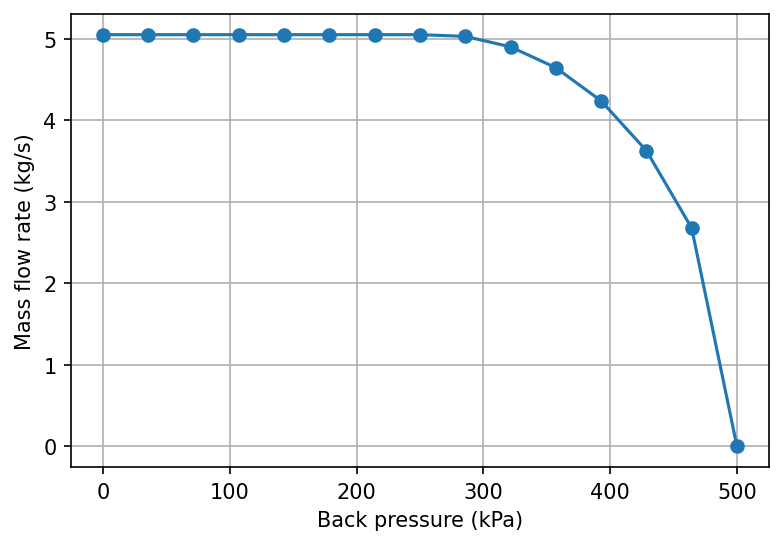

Max flow rate: 5.052 kilogram / second


In [38]:
mass_flow_rates = Q_(np.zeros_like(back_pressures), 'kg/s')
for idx, p in enumerate(back_pressures):
    if p > p_crit:
        root = root_scalar(find_mach_pressure, x0=0.1, x1=0.2, args=(p/pt, gamma))
        Me = root.root
        
        pe = pt * stagnation_pressure(Me, gamma)
        Te = Tt * stagnation_temperature(Me, gamma)
        mass_flow_rates[idx] = (
            pe * exit_area * Me * np.sqrt(gamma * gas_constant_air * Te) / 
            (gas_constant_air * Te)
            ).to('kg/s')
    else:
        mass_flow_rates[idx] = (
            p_crit * exit_area * np.sqrt(gamma * gas_constant_air * T_crit) / 
            (gas_constant_air * T_crit)
            ).to('kg/s')

plt.plot(back_pressures.to('kPa').magnitude, mass_flow_rates.magnitude, 'o-')
plt.xlabel('Back pressure (kPa)')
plt.ylabel('Mass flow rate (kg/s)')
plt.grid()
plt.show()

print(f'Max flow rate: {np.max(mass_flow_rates): .3f}')

## Converging-diverging nozzles